# Let's Grow More Internship

# 01 - BEGINNER LEVEL TASK

# Task - 3 : Image to Pencil Sketch with Python


# Name : Prashant Kumar

***Import Libraries***

In [1]:
import cv2
import matplotlib.pyplot as plt

***Read Photo***

In [2]:
img=cv2.imread("image.jpg")

***Show Image using OpenCV***

In [3]:
cv2.imshow('original_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

***Display Using Matplotlib***

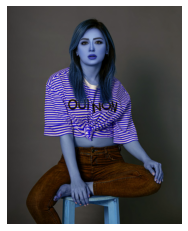

In [4]:
plt.imshow(img)
plt.axis(False)
plt.show()

***Convert BGR to RGB: Method 1***

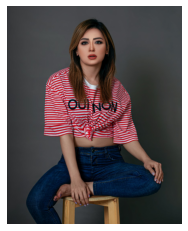

In [5]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.show()

***Convert BGR to RGB: Method-2***


***Using cvtColor method of OpenCV.***

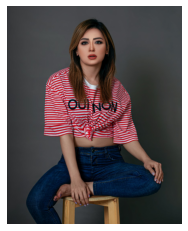

In [6]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.show()

# Converting a photo to pencil sketch

***Convert to Grey Image***

In [7]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

***Invert Image***

In [8]:
invert_img=cv2.bitwise_not(grey_img)

***Blur image***

In [9]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

***Invert Blurred Image***

In [10]:
invblur_img=cv2.bitwise_not(blur_img)

***Sketch***

In [11]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

***Save Sketch***

In [12]:
cv2.imwrite('sketch.png', sketch_img)

True

***Display sketch***

In [13]:
cv2.imshow('sketch_image',sketch_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

***Original Image vs Sketch***

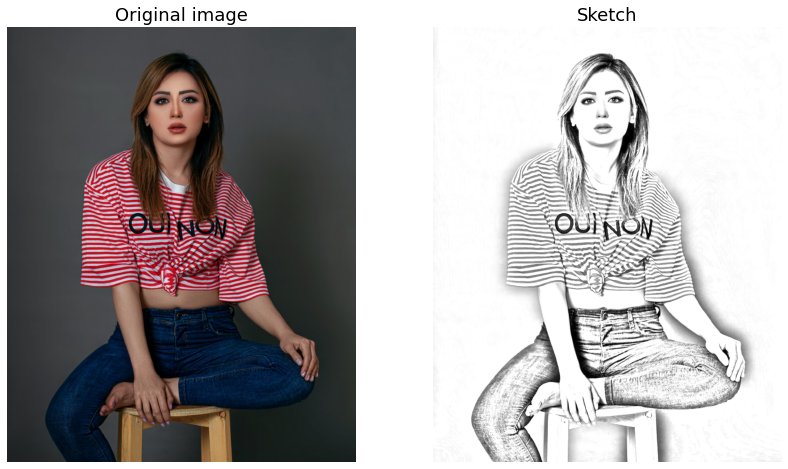

In [14]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(RGB_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()

# All In One Using Numpy and cv2

In [15]:
import cv2
import numpy as np

jc = cv2.imread("image.jpg")

scale_percent = 0.60

width = int(jc.shape[1]*scale_percent)
height = int(jc.shape[0]*scale_percent)

dim = (width,height)
resized = cv2.resize(jc,dim,interpolation = cv2.INTER_AREA)

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)



gray = cv2.cvtColor(sharpened , cv2.COLOR_BGR2GRAY)
inv = 255-gray
gauss = cv2.GaussianBlur(inv,ksize=(15,15),sigmaX=0,sigmaY=0)

def dodgeV2(image,mask):
    return cv2.divide(image,255-mask,scale=256)

pencil_jc = dodgeV2(gray,gauss)



cv2.imshow('resized',resized)
cv2.imshow('sharp',sharpened)
cv2.imshow('gray',gray)
cv2.imshow('inv',inv)
cv2.imshow('gauss',gauss)
cv2.imshow('pencil sketch',pencil_jc)
#cv2.imwrite("D:\Python36\siva_written.jpg",pencil_jc)
cv2.waitKey(0)
cv2.destroyAllWindows()